<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/New_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1za85mE20uoy3TF_Sv2Jv4ANIzRb3ccVM'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access

In [0]:
downloaded.GetContentFile('Data_Speed_Variation_Final.csv')

In [48]:
import pandas as pd
df2 = pd.read_csv('Data_Speed_Variation_Final.csv') 
df2

,Time,DVL1,DVL2,DVL3,DVL4
0,0.0,0.00,0.000000,0.00,0.00
1,0.0,20.00,20.000000,20.00,20.00
2,0.1,20.00,20.000000,20.00,20.00
3,0.2,20.00,20.000000,20.00,20.00
4,0.3,20.00,20.000000,20.00,20.00
...,...,...,...,...,...
49996,5000.0,2.37,2.360000,2.47,2.51
49997,5000.0,2.37,2.360000,2.47,2.51
49998,5000.0,2.37,2.360000,2.47,2.51
49999,4999.8,2.37,2.359027,2.47,2.51


In [0]:
df2["Time"] = df2["Time"].fillna(0)

In [50]:
df2

,Time,DVL1,DVL2,DVL3,DVL4
0,0.0,0.00,0.000000,0.00,0.00
1,0.0,20.00,20.000000,20.00,20.00
2,0.1,20.00,20.000000,20.00,20.00
3,0.2,20.00,20.000000,20.00,20.00
4,0.3,20.00,20.000000,20.00,20.00
...,...,...,...,...,...
49996,5000.0,2.37,2.360000,2.47,2.51
49997,5000.0,2.37,2.360000,2.47,2.51
49998,5000.0,2.37,2.360000,2.47,2.51
49999,4999.8,2.37,2.359027,2.47,2.51


In [0]:
y=df2["DVL1"] = df2["DVL1"].fillna(0)

In [0]:
y=y.values

In [96]:
y

array([20.      , 20.      , 20.      , ...,  2.690678,  2.690923,
        2.691079])

In [0]:
downloaded = drive.CreateFile({'id':'1NiHiOzShPCDOKPnfNjrzjEcpvWoA8MwS'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access

In [0]:
downloaded.GetContentFile('Training_Data_FEW_FISHES.csv')

In [80]:
import pandas as pd
df1 = pd.read_csv('Training_Data_FEW_FISHES.csv') 
df1

,Time,DVL1,DVL2,DVL3,DVL4
0,NaN,NaN,NaN,NaN,NaN
1,0.0,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
49996,4999.5,2.564325,2.547429,2.685580,2.715926
49997,4999.6,2.564293,2.547059,2.685737,2.715903
49998,4999.7,2.564267,2.546647,2.685912,2.715890
49999,4999.8,2.564253,2.546235,2.686088,2.715891


In [0]:
df1["DVL1"] = df1["DVL1"].fillna(0)

In [0]:
data_to_use=df1['DVL1'].values

In [0]:
scaled_dataset=data_to_use

In [84]:
scaled_dataset

array([ 0.      , 20.      , 20.      , ...,  2.564267,  2.564253,
        2.564248])

In [0]:
X=scaled_dataset

In [86]:
X

array([ 0.      , 20.      , 20.      , ...,  2.564267,  2.564253,
        2.564248])

In [87]:
y

array([ 0.  , 20.  , 20.  , ...,  2.37,  2.37,  2.37])

In [0]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y


X, y = window_data(scaled_dataset, 10)

In [0]:
X_train  = np.array(X[:45000])
y_train = np.array(y[:45000])

X_test = np.array(X[45000:])
y_test = np.array(y[45000:])

In [90]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (45000, 10)
y_train size: (45000,)
X_test size: (4991, 10)
y_test size: (4991,)


In [0]:
dates = df1['Time']
train_date = dates[:45000]
test_date = dates[-4991:]

In [0]:
n_steps = 10

In [0]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [0]:
X = X_train
y = y_train

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
history=model.fit(X, y, epochs=10, verbose=0)

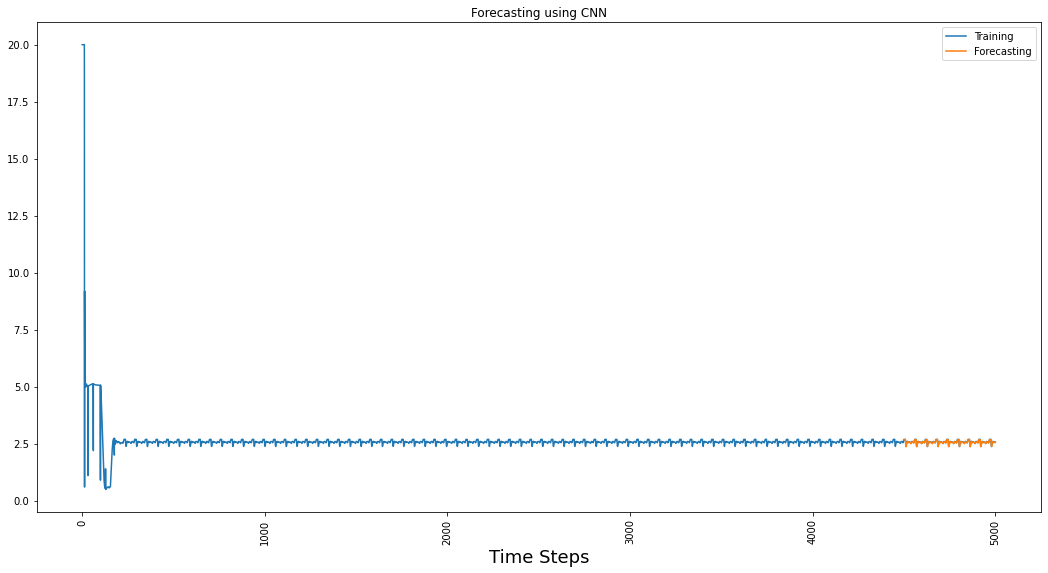

In [95]:
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]
    
#print(y_pred)
#print(y_test)

plt.figure(figsize = (18,9))

plt.plot(dates,scaled_dataset,label="Training")
plt.plot(test_date,y_pred,label="Forecasting")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

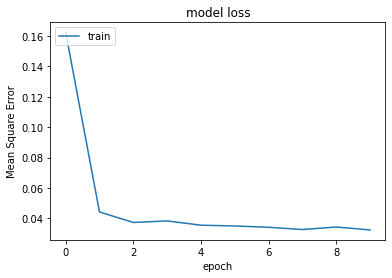

In [39]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
df1

,Time,DVL1,DVL2,DVL3,DVL4
0,NaN,0.000000,NaN,NaN,NaN
1,0.0,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
49996,4999.5,2.564325,2.547429,2.685580,2.715926
49997,4999.6,2.564293,2.547059,2.685737,2.715903
49998,4999.7,2.564267,2.546647,2.685912,2.715890
49999,4999.8,2.564253,2.546235,2.686088,2.715891


In [44]:
df2

,Time,DVL1,DVL2,DVL3,DVL4
0,0,0.00,0,0.00,0.00
1,0.00E+00,20.00,2.00E+01,20.00,20.00
2,1.00E-01,20.00,2.00E+01,20.00,20.00
3,2.00E-01,20.00,2.00E+01,20.00,20.00
4,3.00E-01,20.00,2.00E+01,20.00,20.00
...,...,...,...,...,...
49996,9.50E+00,2.37,2.36E+00,5.57,2.51
49997,9.60E+00,2.37,2.36E+00,5.56,2.51
49998,9.70E+00,2.37,2.36E+00,5.57,2.51
49999,0,2.37,DVL,2.47,2.51


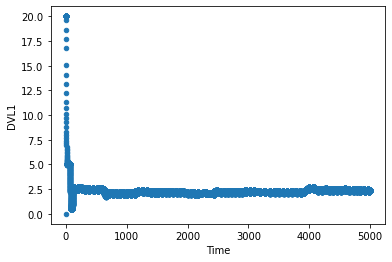

In [97]:
ax = plt.gca()

df2.plot(kind='scatter',x='Time',y='DVL1',ax=ax)
#df.plot(kind='scatter',x='Time',y='DVL2', color='red', ax=ax)
#df.plot(kind='scatter',x='Time',y='DVL3', color='green', ax=ax)
#df.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)

plt.show()  #Ground Truth, Labels

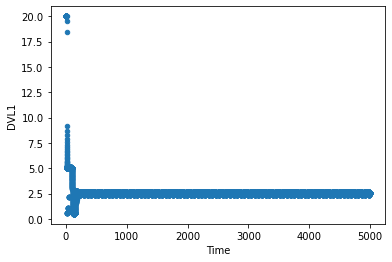

In [98]:
ax = plt.gca()

df1.plot(kind='scatter',x='Time',y='DVL1',ax=ax)
#df.plot(kind='scatter',x='Time',y='DVL2', color='red', ax=ax)
#df.plot(kind='scatter',x='Time',y='DVL3', color='green', ax=ax)
#df.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)

plt.show() # Training Data

In [0]:
# Now scrables the training data with the biao fish model